# **Creación de dashboard


El objetivo de este segmento del trabajo es mostrar el paso a paso de creación del dashboard con streamlit


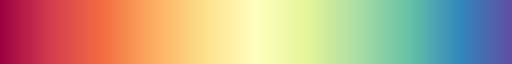

In [1]:
import pandas as pd
import os
import pandas as pd
from sqlalchemy import create_engine
import dotenv
import math
import numpy as np
import streamlit as st

import seaborn as sns
import matplotlib.pylab as plt
import plotly.express as px

sns.set_theme('notebook')
sns.color_palette("Spectral", as_cmap=True)



## Se realizo la configuración de la pagina con el logo de la universidad

In [2]:

st.set_page_config(
    page_title="Sistema electrico Colombiano 2010 a 2024",
    page_icon="🧊",
    layout="wide")

st.sidebar.image('logo 2.png', use_column_width=True)

2024-05-30 17:55:53.486 
  command:

    streamlit run /opt/miniconda3/envs/trabajo_final/lib/python3.12/site-packages/ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator(_root_container=1, _parent=DeltaGenerator())

## Se realizo la configuración de titulo y subtitulo

In [3]:
# Crear una aplicación de Streamlit
st.title("Sistema Electrico Colombiano 2010 a 2024")
st.subheader("Por: Julián Andrés Santos Méndez ,Juan Felipe Sepulveda Mantilla, Luz Edilsa Ortiz Lopez,Julian Obando Scarpetta")
st.divider()

DeltaGenerator()

## Conexión a la Base de Datos de Analítica en AWS

In [4]:
DB_USER_AWS="postgres"
DB_PASSWORD_AWS="juliansantos2024"
DB_HOST_AWS="analitica-julian-santos.c3mz2sp0n4ch.us-east-1.rds.amazonaws.com"
DB_PORT_AWS="5432"
DB_NAME_AWS="analitica_sistema_electrico"

conn = create_engine(f'postgresql://{DB_USER_AWS}:{DB_PASSWORD_AWS}@{DB_HOST_AWS}:{DB_PORT_AWS}/{DB_NAME_AWS}', echo=False)

## Lectura del DataSet de Analítica

In [5]:
sql_query = """SELECT * FROM analitica_sistema_electrico_colombia"""
df_sistema_electrico = pd.read_sql_query(sql_query, con=conn)
df_sistema_electrico['Date'] = pd.to_datetime(df_sistema_electrico['Date'])
df_sistema_electrico

,Date,generacion_sistema_daily,generacion_ideal_sistema_daily,perdidas_sistema_daily,volumen_util_energia_sistema_daily,emisiones_sistema_daily,aportes_energia_sistema_daily,aportes_energia_mediaHist_sistema_daily,capacidad_util_energia_sistema_daily,demanda_real_sistema_daily,exportaciones_sistema_daily,importaciones_sistema_daily,precio_bolsa_sistema_daily,precio_escasez_sistema_daily,comsumo_combustible_daily,disponibilidad_real_daily
0,2010-01-01,1.154191e+08,1.154409e+08,2079352.97,1.000661e+10,0.00000,45616100,75130000,15428396811,1.133616e+08,4536.91,21849.64,120.501228,356.70894,7.278816e+05,1.201925e+07
1,2010-01-02,1.276812e+08,1.276983e+08,2226467.46,9.995147e+09,0.00000,43097100,75130000,15428396811,1.254718e+08,12551.38,17079.39,118.495340,355.06286,7.439290e+05,1.198702e+07
2,2010-01-03,1.236378e+08,1.236548e+08,2509638.35,9.992677e+09,0.00000,43400400,75130000,15428396811,1.211452e+08,9118.35,17032.69,121.160145,355.07299,7.490638e+05,1.199573e+07
3,2010-01-04,1.459575e+08,1.444114e+08,2032914.64,9.965341e+09,0.00000,40410400,75130000,15428396811,1.439317e+08,1513370.10,7174.60,123.962937,355.07299,7.727362e+05,1.158610e+07
4,2010-01-05,1.521480e+08,1.490348e+08,2278901.51,9.926760e+09,0.00000,41190600,75130000,15428396811,1.498691e+08,3057651.95,0.00,120.666437,354.78317,7.674916e+05,1.165207e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5229,2024-04-26,2.246048e+08,2.246048e+08,3468541.50,5.399084e+09,81390.03841,175197100,222790000,17359561885,2.211362e+08,0.00,0.00,215.201028,742.65054,1.077649e+06,1.492237e+07
5230,2024-04-27,2.171655e+08,2.171655e+08,3317765.92,5.454065e+09,72221.14808,190925700,222790000,17359561885,2.138478e+08,0.00,0.00,160.221522,742.65054,9.592092e+05,1.465035e+07
5231,2024-04-28,1.941888e+08,1.941931e+08,2880163.08,5.557993e+09,65899.83428,206187700,222790000,17359561885,1.913129e+08,12438.22,4315.01,106.818940,742.65054,8.649091e+05,1.526666e+07
5232,2024-04-29,2.223545e+08,2.223672e+08,2869374.84,5.672510e+09,50743.73833,303206200,222790000,17359561885,2.194978e+08,41646.96,12662.44,136.110230,742.65054,6.467688e+05,1.529123e+07


### Descripción de las Variables

A continuación se lista todas las variables disponibles para el analisis.
El dataset continue el valor de la variable por cada dia de operacion del sistema.

| No. | Variable                                | Metrica                               | Unidad | Descripción                                                                                                    | Unidad de Análisis |
|-----|-----------------------------------------|---------------------------------------|--------|----------------------------------------------------------------------------------------------------------------|---------------------|
| 1   | generacion_sistema_daily                | Generación por Sistema                | kWh    | Generación neta de cada una de las plantas Nacionales en sus puntos de frontera.                               | GWh                 |
| 2   | generacion_ideal_sistema_daily          | Generación Ideal por Sistema          | kWh    | Despacho de generación que resulta de considerar una red de transporte inexistente.                             | GWh                 |
| 3   | perdidas_sistema_daily                  | Pérdidas de Energía por Sistema       | kWh    | Cantidad de las inyecciones de energía al Sistema de Transmisión Nacional, menos la cantidad de los flujos... | GWh                 |
| 4   | volumen_util_energia_sistema_daily     | Volumen Útil diario Energía Sistema  | kWh    | Volumen almacenado por encima del Nivel Mínimo Técnico, reportado diariamente por los agentes.                 | GWh                 |
| 5   | emisiones_sistema_daily                 | Emisiones de CO2 por RecursoComb      | TonCO2 | Emisiones totales de Dióxido de Carbono – CO2 de las plantas de generación registradas ante el CND.            | kTonCO2             |
| 6   | aportes_energia_sistema_daily           | Aportes Energía por Río               | kWh    | Caudales en energía de los ríos que aportan agua a algún embalse del SIN.                                       | GWh                 |
| 7   | aportes_energia_mediaHist_sistema_daily| Aportes Media Histórica Energía por Río| kWh    | Caudal medio mensual histórico en energía para los ríos del SIN.                                                | GWh                 |
| 8   | capacidad_util_energia_sistema_daily   | Capacidad Útil Energía por Embalse    | kWh    | Corresponde al Volumen Útil del Embalse, que se define como el volumen almacenado entre el nivel Mínimo Técnico y el Nivel Máximo Físico | GWh                 |
| 9   | demanda_real_sistema_daily             | Demanda Real por sistema              | kWh    | Demanda de usuarios regulados y no regulados que hacen parte del Sistema Interconectado Nacional.               | GWh                 |
| 10  | exportaciones_sistema_daily            | Exportaciones de energía              | kWh    | Transferencias de Energía desde Colombia hacia otros países.                                                    | MWh                 |
| 11  | importaciones_sistema_daily            | Importaciones de energía              | kWh    | Transferencias de Energía desde otros países para abastecer la demanda nacional.                                | MWh                 |
| 12  | precio_bolsa_sistema_daily             | Precio Bolsa Promedio Aritmético      | COP/kWh| Promedio aritmético del precio de bolsa nacional.                                                               | COP/kWh             |
| 13  | precio_escasez_sistema_daily           | Precio Marginal Escasez por Sistema   | COP/kWh| Precio Marginal de Escasez calculado de acuerdo con la Resolución CREG 140 del 2017.                            | COP/kWh             |
| 14  | comsumo_combustible_daily              | Consumo Combustible MBTU por Recurso  | MBTU   | Los generadores térmicos deben reportar diariamente el consumo de combustible en MBTU.                          | MMBTU               |
| 15  | disponibilidad_real_daily              | Disponibilidad Real  | kW   | Disponibilidad promedio calculada a partir de la fecha de los eventos que modifican la disponibilidad de las unidades de generacion de los generadores, asi como de la disponibilidad reportada al Centro de despacho.                       | MW         |

### Conversion de Unidades a las Unidades de Análisis

In [6]:
def convertir_unidades(df): 
    # Crear un diccionario con los factores de conversión
    conversion_factors = {
        'generacion_sistema_daily': 1e-6,  # kWh to GWh
        'generacion_ideal_sistema_daily': 1e-6,  # kWh to GWh
        'perdidas_sistema_daily': 1e-6,  # kWh to GWh
        'volumen_util_energia_sistema_daily': 1e-6,  # kWh to GWh
        'emisiones_sistema_daily': 1e-3,  # TonCO2 to kTonCO2
        'aportes_energia_sistema_daily': 1e-6,  # kWh to GWh
        'aportes_energia_mediaHist_sistema_daily': 1e-6,  # kWh to GWh
        'capacidad_util_energia_sistema_daily': 1e-6,  # kWh to GWh
        'demanda_real_sistema_daily': 1e-6,  # kWh to GWh
        'exportaciones_sistema_daily': 1e-3,  # kWh to MWh
        'importaciones_sistema_daily': 1e-3,  # kwh to MWh
        'precio_bolsa_sistema_daily': 1,  # COP/kWh to COP/kWh (no conversion needed)
        'precio_escasez_sistema_daily': 1,  # COP/kWh to COP/kWh (no conversion needed)
        'comsumo_combustible_daily': 1e-3,  # MBTU to MMBTU
        'disponibilidad_real_daily': 1e-3,  # kWh to MWh
    }

    # Aplicar las conversiones
    for column, factor in conversion_factors.items():
        df[column] = df[column] * factor

    # Mostrar el DataFrame convertido
    return df

In [7]:
df_sistema_electrico_converted = df_sistema_electrico.copy()
df_sistema_electrico_converted = convertir_unidades(df_sistema_electrico_converted)


## Creación del filtro de año

In [8]:
df_sistema_electrico_converted['Date'] = pd.to_datetime(df_sistema_electrico_converted['Date'])

In [9]:
# Establecer la columna 'Date' como índice
df_sistema_electrico_converted = df_sistema_electrico_converted.set_index('Date')

In [10]:
default_years = [2024,2023,2022,2021, 2020, 2019,2018,2017,2016,2015,2014]
años = df_sistema_electrico_converted.index.year.unique()
años_seleccionados = st.sidebar.multiselect('Selecciona los Años', años, default=default_years)

# Filtrar el dataframe por los años seleccionados
df_filtrado = df_sistema_electrico_converted[df_sistema_electrico_converted.index.year.isin(años_seleccionados)]

## Funciones y tarjetas principales

Se escogieron las principales variables representativas para mostrar como tarjetas en el dashboard, de estas se sacaron promedios que van enlazadas con la fechas segun lo filtre el usuario


In [11]:

promedio_Precio = df_filtrado['precio_bolsa_sistema_daily'].mean()
promedio_generacion = df_filtrado['generacion_sistema_daily'].mean()
promedio_perdidas = df_filtrado['perdidas_sistema_daily'].mean()
promedio_aportes= df_filtrado['aportes_energia_sistema_daily'].mean()
promedio_volumen = df_filtrado['volumen_util_energia_sistema_daily'].mean()

# Mostrar los promedios en tarjetas
col1, col2, col3, col4, col5 = st.columns(5)
col1.metric("Promedio precio (COP/kWh)", f"{promedio_Precio:.2f}")
col2.metric("Promedio Generación (GWh)", f"{promedio_generacion:.2f}")
col3.metric("Promedio Pérdidas (GWh)", f"{promedio_perdidas:.2f}")
col4.metric("Promedio Aportes (GWh)", f"{promedio_aportes:.2f}")
col5.metric("Promedio Volumen (GWh)", f"{promedio_volumen:.2f}")

DeltaGenerator()

## Creación de graficos

Se definieron variables que tuvieran relación para poder graficar y explicar los modelos

In [12]:
# Gráfico de Variables de energia
fig1, ax1 = plt.subplots()
ax1.plot(df_filtrado.index, df_filtrado['generacion_sistema_daily'], label='Generación Sistema Diario')
ax1.plot(df_filtrado.index, df_filtrado['generacion_ideal_sistema_daily'], label='Generación Ideal Sistema Diario')
ax1.plot(df_filtrado.index, df_filtrado['demanda_real_sistema_daily'], label='Demanda Real Sistema Diario')
ax1.legend()
ax1.set_title('Variables de energía')
ax1.set_xlabel('Fecha')
ax1.set_ylabel('GWh')

# Gráfico de aportes de energía y aportes sistema media
fig2, ax2 = plt.subplots()
ax2.plot(df_filtrado.index, df_filtrado['aportes_energia_sistema_daily'], label='Aportes de Energía')
ax2.plot(df_filtrado.index, df_filtrado['aportes_energia_mediaHist_sistema_daily'], label='Aportes Sistema Media')
ax2.legend()
ax2.set_title('Aportes de Energía y Aportes Sistema Media')
ax2.set_xlabel('Fecha')
ax2.set_ylabel('GWh')

# Gráfico de volumen útil de energía y capacidad útil de energía
fig3, ax3 = plt.subplots()
ax3.plot(df_filtrado.index, df_filtrado['volumen_util_energia_sistema_daily'], label='Volumen Útil de Energía')
ax3.plot(df_filtrado.index, df_filtrado['capacidad_util_energia_sistema_daily'], label='Capacidad Útil de Energía')
ax3.legend()
ax3.set_title('Volumen Útil de Energía y Capacidad Útil de Energía')
ax3.set_xlabel('Fecha')
ax3.set_ylabel("GWh")

# Mostrar las figuras en el dashboard
col6, col7 , col8= st.columns(3)
with col6:
    st.pyplot(fig1)
with col7:
    st.pyplot(fig2)
with col8:
    st.pyplot(fig3)

# Gráfico de perdida de energía 
fig4, ax4 = plt.subplots()
ax4.plot(df_filtrado.index, df_filtrado['perdidas_sistema_daily'], label='Perdidas de energía de sistema')
ax4.legend()
ax4.set_title('Perdidas de energía')
ax4.set_xlabel('Fecha')
ax4.set_ylabel('GWh')

# Gráfico de precio
fig5, ax5 = plt.subplots()
ax5.plot(df_filtrado.index, df_filtrado['precio_bolsa_sistema_daily'], label='Precio Bolsa')
ax5.plot(df_filtrado.index, df_filtrado['precio_escasez_sistema_daily'], label='Precio escacez')
ax5.legend()
ax5.set_title('Precio de la energía en bolsa')
ax5.set_xlabel('COP/kWh')
ax5.set_ylabel("GWh")

total_exportaciones = df_filtrado['exportaciones_sistema_daily'].sum()
total_importaciones = df_filtrado['importaciones_sistema_daily'].sum()

# Gráfico de barras de importaciones y exportaciones
fig6, ax6 = plt.subplots()
ax6.bar('exportaciones', total_exportaciones, label='exportaciones')
ax6.bar('importaciones', total_importaciones, label='importaciones')
ax6.set_title('Importaciones y Exportaciones Totales')
ax6.set_ylabel('MWh')
ax6.legend()

# Mostrar las figuras en el dashboard
col9, col10 , col11= st.columns(3)
with col9:
    st.pyplot(fig4)
with col10:
    st.pyplot(fig5)
with col11:
    st.pyplot(fig6)